## Loss Functions in PyTorch

[link](https://ut.philkr.net/deeplearning/first_example/loss_functions_in_pytorch/)

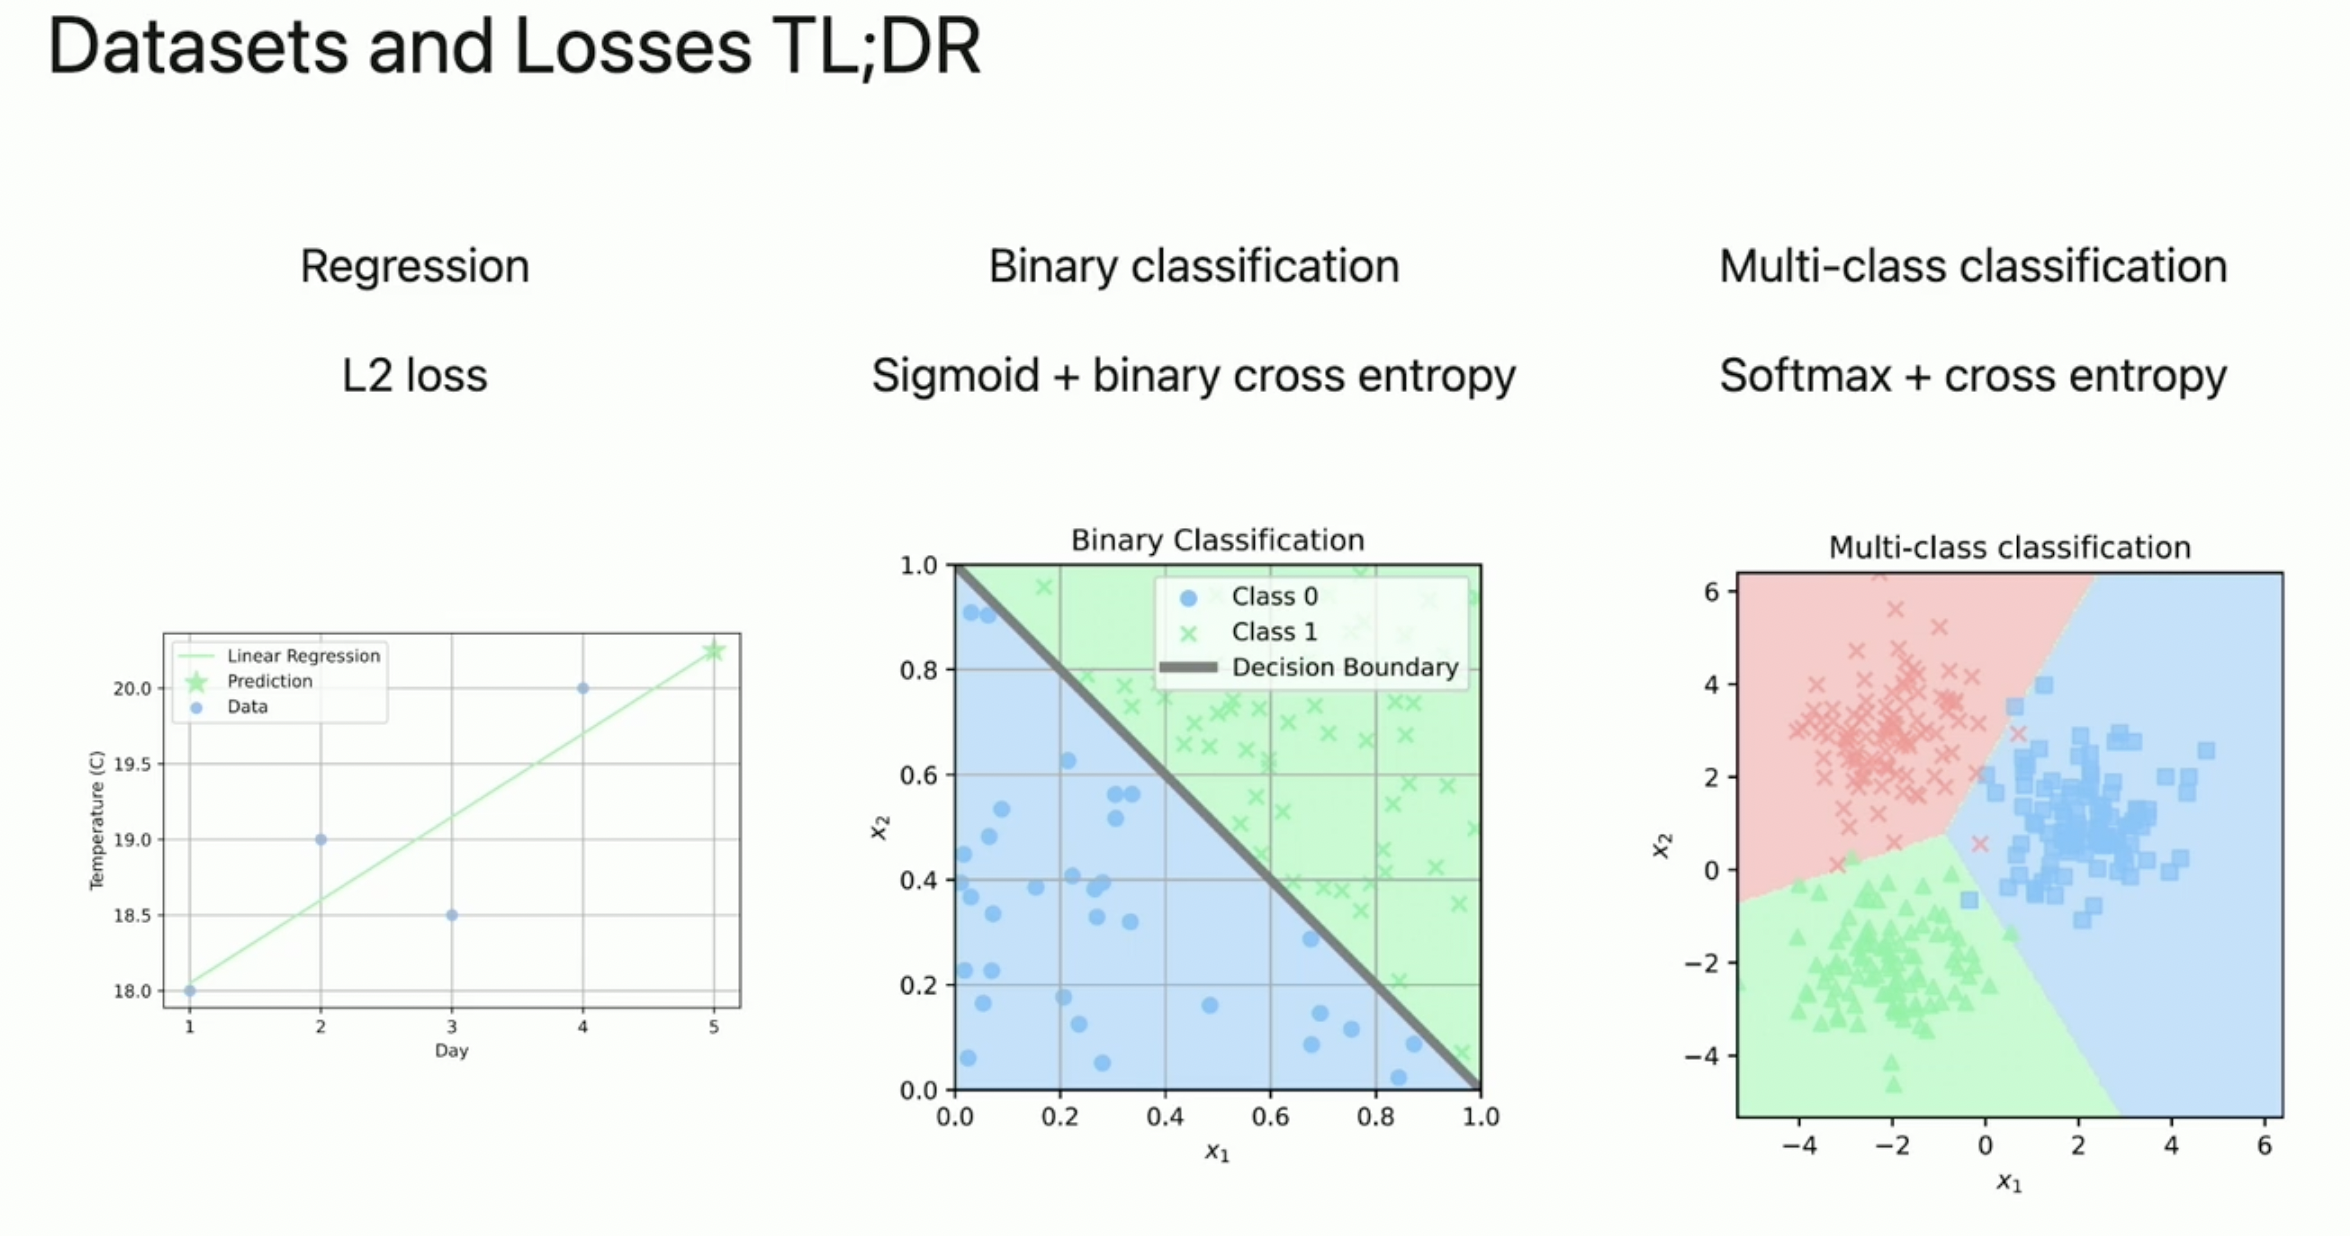

$$
\begin{align*}
softplus(x)&:= \frac{1}{\sum_{i=1}^ne^{x_i}} 
\begin{pmatrix}
    e^{x_1}\\ 
    e^{x_2}\\ 
    \vdots \\ 
    e^{x_n}
\end{pmatrix},\quad x \in \mathbb{R^n}\\
sigmoid(x) &:= \frac{1}{1+e^{-x}}, \quad x \in \mathbb{R} 
\end{align*}
$$
Notice that, if $x\in \mathbb{R}^2$
$$
softplus(x)=\frac{1}{e^{x_1}+e^{x_2}} 
\begin{pmatrix}
    e^{x_1}\\ 
    e^{x_2}
\end{pmatrix}=\begin{pmatrix}
    \frac{1}{1+e^{x_2-x_1}}\\ 
    \frac{1}{1+e^{x_1-x_2}}
\end{pmatrix}
=\begin{pmatrix}
    sigmoid(x_1-x_2)\\ 
   sigmoid(x_2-x_1)
\end{pmatrix},
$$

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
model = nn.Linear(10, 1)

In [3]:
x = torch.randn(20, 10)
y = torch.randn(20, 1)
print(f'{x =} {y = }')

x =tensor([[ 8.0240e-02,  3.9862e-01, -1.5400e-01,  1.0004e+00,  3.4891e-02,
          1.9139e+00,  1.5132e+00,  1.1412e+00, -3.0594e-01,  4.3699e-01],
        [ 1.2304e+00, -1.9841e+00, -1.0135e+00,  4.9258e-01, -1.0896e+00,
          7.9497e-01,  2.3476e-01,  1.5156e-01,  6.2577e-01,  1.2127e+00],
        [ 8.7004e-01,  1.5459e-01, -1.4382e-01,  1.7510e-01,  9.0517e-01,
         -4.2099e-01, -2.3295e+00, -1.0495e+00,  1.9594e+00,  2.4745e-01],
        [-1.1791e+00, -2.8294e-01,  1.7308e+00,  1.6388e+00, -3.8097e-01,
         -3.8866e-01,  5.4981e-02,  5.6945e-01, -7.4055e-01,  2.7932e-01],
        [ 1.4603e-01,  5.4079e-01,  2.8950e-01, -9.0249e-01, -4.2438e-01,
         -1.4994e-01,  2.7373e+00,  4.8847e-01,  1.9060e+00,  1.2074e+00],
        [-1.5519e-02, -5.2217e-01, -1.2638e+00, -1.3810e+00,  8.0290e-01,
         -2.7019e-01,  3.1568e-02,  9.5900e-02,  1.1965e+00,  2.1473e+00],
        [ 6.0602e-01,  6.5782e-01,  4.0210e-01,  6.8666e-02,  1.7824e+00,
         -2.7909e-01, -4.3601

In [4]:
pred_y = model(x)
print(f'{pred_y = }')

pred_y = tensor([[-1.8455],
        [-0.5118],
        [ 0.8597],
        [-1.3950],
        [-1.4352],
        [-0.3945],
        [ 0.4755],
        [ 0.6263],
        [ 0.7954],
        [-0.0131],
        [ 0.0183],
        [-0.7360],
        [ 1.0779],
        [-0.1532],
        [ 0.3974],
        [-1.5976],
        [-0.4274],
        [-0.5421],
        [-0.1925],
        [-0.8349]], grad_fn=<AddmmBackward0>)


### Linear Regression
Compute mse loss

$$mse(\hat{y},y)=\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [5]:
loss = torch.nn.MSELoss()
output = loss(pred_y, y)
print(f'{output = }')

output = tensor(1.8757, grad_fn=<MseLossBackward0>)


In [6]:
def mse_loss(pred_y, y):
    return ((pred_y - y) ** 2).mean()

print(f'{mse_loss(pred_y, y) = }')

mse_loss(pred_y, y) = tensor(1.8757, grad_fn=<MeanBackward0>)


The general asumption in machine learning is 
$$
(X_1, Y_1), (X_2, Y_2), \dots, (X_n, X_n) \;\;\overset{\text{i.i.d.}}{\sim}\; P_{X,Y}
$$
where the data $\{(x_i,y_i)\}_{i=1}^n$ is a realization of $X_i,Y_i$ respectively.

Notice that from this assumption we optain
$$
\begin{align*}
p\left(Y_{1:n}=y_{1:n}|X_{1:n}=x_{1:n}\right)&= \frac{p\left(Y_{1:n}=y_{1:n},X_{1:n}=x_{1:n}\right)}{p\left(X_{1:n}=x_{1:n}\right)}= \prod_{i=1}^n\frac{p\left(Y_{i}=y_{i},X_{i}=x_{i}\right)}{p\left(X_{i}=x_{i}\right)}=\prod_{i=1}^np(Y_{i}=y_{i}|X_{i}=x_{i})
\end{align*}
$$


# Binary Classification

Conisider $Y$ the label random variable. We assume that $Y:\Omega \to  \{0,1\}$ follows a Bernoulli distribution with probability of success given $X=x$ equal to $p(x)$:

$$p(Y=y|X=x)=
\begin{cases}
p(x),\quad &\text{ if } y=1,\\
1-p(x),&\text{ if } y=0.
\end{cases}
=p(x)^y(1-p(x))^{1-y}
$$

We tray to find the function $p(x)$ that maximize the likelihood of the data.

$$
\begin{align*}
p\left(Y_{1:n}=y_{1:n}|X_{1:n}=x_{1:n}\right)=\prod_{i=1}^np(Y_{i}=y_{i}|X_{i}=x_{i})=\prod_{i=1}^np(x_i)^{y_i}(1-p(x_i))^{1-y_i}
\end{align*}
$$
This is equivlaent to minimizing the neggative log-likelihood
$$
\begin{align*}
-\log(p\left(Y_{1:n}=y_{1:n}|X_{1:n}=x_{1:n}\right))&=-\log\left(\prod_{i=1}^np(x_i)^{y_i}(1-p(x_i))^{1-y_i}\right),\\
&=-\sum_{i=1}^n\log\left(p(x_i)^{y_i}(1-p(x_i))^{1-y_i}\right),\\
&=-\sum_{i=1}^n\left[y_i\log(p(x_i))+(1-y_i)\log(1-p(x_i))\right],\\
\end{align*}
$$



Compute binary cross entropy loss


In [7]:
y = torch.randint(0, 2, (20,1)).float()

In [8]:
loss_fn = F.binary_cross_entropy_with_logits
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(0.7141, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [9]:
loss_fn = torch.nn.BCEWithLogitsLoss()
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(0.7141, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [10]:
loss_fn = torch.nn.BCELoss()
output = loss_fn(F.sigmoid(pred_y), y)
print(f'{output = }')

output = tensor(0.7141, grad_fn=<BinaryCrossEntropyBackward0>)


In [11]:
def binary_cross_entropy_with_logits(pred_y, y):
    p = nn.functional.sigmoid(pred_y) #Logits
    return -(y * torch.log(p) + (1 - y) * torch.log(1-p)).mean() #BCE

loss_fn = binary_cross_entropy_with_logits
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(0.7141, grad_fn=<NegBackward0>)


# Multi-class classification

Conisider $Y$ the label random variable. We assume that $Y:\Omega \to  \{1,2,\dots,K\}$ follows a Categorical distribution where the probability distribution of class $1\leq j\leq K$ given $X=x$ is $p_j(x)$ with $\sum_{j=1}^Kp_j(x)=1$. Then we have

$$p(Y=y|X=x)=p_y(x)=\prod_{j=1}^K p_j(x)^{1_{\{y=j\}}}
$$

We tray to find the function $p(x)=(p_1(x),\dots,p_K(x))$ that maximize the likelihood of the data.

$$
\begin{align*}
p\left(Y_{1:n}=y_{1:n}|X_{1:n}=x_{1:n}\right)=\prod_{i=1}^np(Y_{i}=y_{i}|X_{i}=x_{i})=\prod_{i=1}^n\prod_{j=1}^K p_j(x_i)^{1_{\{y_i=j\}}}=\prod_{i=1}^np_{y_i}(x_i)
\end{align*}
$$
This is equivlaent to minimizing the neggative log-likelihood
$$
\begin{align*}
-\log(p\left(Y_{1:n}=y_{1:n}|X_{1:n}=x_{1:n}\right))&=-\log\left(\prod_{i=1}^n\prod_{j=1}^K p_j(x_i)^{1_{\{y_i=j\}}}\right)=-\sum_{i=1}^n\sum_{j=1}^K1_{\{y_i=j\}}\log\left(p_j(x_i)\right)\\
&=-\sum_{i=1}^n\log\left(p_{y_i}(x_i)\right)
\end{align*}
$$


In [12]:
n_classes = 3
model = nn.Linear(10, n_classes)
x = torch.randn(20, 10)
y = torch.randint(0, n_classes, (20,))

In [13]:
pred_y = model(x)
loss_fn = nn.CrossEntropyLoss()
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(1.0876, grad_fn=<NllLossBackward0>)


In [14]:
loss_fn = nn.functional.cross_entropy
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(1.0876, grad_fn=<NllLossBackward0>)


In [15]:
def cross_entropy(pred_y, y):
    probs = nn.functional.softmax(pred_y, dim=1)
    p_yi=probs[torch.arange(y.shape[0]), y]
    log_p_yi = torch.log(p_yi)
    return -log_p_yi.mean()

loss_fn = cross_entropy
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(1.0876, grad_fn=<NegBackward0>)


### Multiple binary classification

Conisider $Y=(Y_1,Y_2,\dots,Y_K)$ the label random variable. We assume that $Y_j:\Omega \to  \{0,1\}$ follows a Bernoulli distribution with probability of success given $X=x$ equal to $p_j(x)$: We aalso assume (this is questionable) that $Y_j$ $1\leq j \leq K$ are independent

$$p(Y_j=y_j|X=x)=
\begin{cases}
p_j(x),\quad &\text{ if } y_j=1,\\
1-p_j(x),&\text{ if } y_j=0.
\end{cases}
=p_j(x)^{y_j}(1-p_j(x))^{1-y_j}
$$

We tray to find the function $p=(p_1,p_2,\dots,p_K)$ that maximize the likelihood of the data.

$$
\begin{align*}
p\left(Y_{1:n}=y_{1:n}|X_{1:n}=x_{1:n}\right)&=\prod_{i=1}^np(Y_{i}=y_{i}|X_{i}=x_{i})
=\prod_{i=1}^np\left(\prod_{j=1}^K\{Y_{i,j}=y_{i,j}\}\left|X_{i}=x_{i}\right.\right),\\
&=\prod_{i=1}^n\prod_{j=1}^Kp\left(Y_{i,j}=y_{i,j}\left|X_{i}=x_{i}\right.\right),\\
&=\prod_{i=1}^n\prod_{j=1}^Kp_j(x_{i})^{y_{i,j}}(1-p_j(x_{i}))^{1-y_{i,j}}
\end{align*}
$$
This is equivlaent to minimizing the neggative log-likelihood
$$
\begin{align*}
-\log\left(p\left(Y_{1:n}=y_{1:n}|X_{1:n}=x_{1:n}\right)\right)&=-\log\left(\prod_{i=1}^n\prod_{j=1}^Kp_j(x_{i})^{y_{i,j}}(1-p_j(x_{i}))^{1-y_{i,j}}\right),\\
&=-\sum_{i=1}^n\sum_{j=1}^K\log\left(p_j(x_{i})^{y_{i,j}}(1-p_j(x_{i}))^{1-y_{i,j}}\right),\\
&=-\sum_{i=1}^n\sum_{j=1}^K\left[y_{i,j}\log(p_j(x_{i}))+(1-y_{i,j})\log(1-p_j(x_{i}))\right],\\
\end{align*}
$$

Note: The loss is also Binary Cross Entropy, but here the mean is in two dimensions (sanmples and output)

In [16]:
n_classes = 3
model = nn.Linear(10, n_classes)
x = torch.randn(20, 10)
y = torch.randint(0, 2, (20, n_classes)).float()


In [17]:
pred_y = model(x)
loss_fn = torch.nn.BCEWithLogitsLoss()
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(0.6820, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [18]:
def binary_cross_entropy_with_logits(pred_y, y):
    p = nn.functional.sigmoid(pred_y) #logits
    return -(y * torch.log(p) + (1 - y) * torch.log(1-p)).mean() #BCE (here mean is in two dimensions)
loss_fn = binary_cross_entropy_with_logits
output = loss_fn(pred_y, y)
print(f'{output = }')

output = tensor(0.6820, grad_fn=<NegBackward0>)
